In [1]:
# Heat budget functions
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
#sd = 12 # Sill depth
f = 6 # Control volume start index near the ice front
s = 72 # Control volume end index at the sill crest
Cp = 3994  # Specific heat content J/kg/C
rho = 999.8 # Density
T0 = 9 # Initial temperature
Area = np.empty([50, 9]) # Cross Y direction
Area[:10, :] = 100
Area[10:20, :] = 200
Area[20:30, :] = 300
Area[30:40, :] = 800
Area[40:, :] = 1600

# File paths
#/Users/weiyangbao/Documents/Model_outputs/qf-tide-hourly/
state_path1 = '/Volumes/Extreme SSD/MITgcm outputs/qf700/state_'
Adv_path1 =  '/Volumes/Extreme SSD/MITgcm outputs/qf700/Adv_'
Dif_path1 = '/Volumes/Extreme SSD/MITgcm outputs/qf700/Dif_'

state_path2 = '/Volumes/Extreme SSD/MITgcm outputs/qf700tide003/state_'
Adv_path2 =  '/Volumes/Extreme SSD/MITgcm outputs/qf700tide003/Adv_'
Dif_path2 = '/Volumes/Extreme SSD/MITgcm outputs/qf700tide003/Dif_'

state_path3 = '/Volumes/Extreme SSD/MITgcm outputs/qf700tide006/state_'
Adv_path3 =  '/Volumes/Extreme SSD/MITgcm outputs/qf700tide006/Adv_'
Dif_path3 = '/Volumes/Extreme SSD/MITgcm outputs/qf700tide006/Dif_'

state_path4 = '/Volumes/Extreme SSD/MITgcm outputs/qf700tide01/state_'
Adv_path4 =  '/Volumes/Extreme SSD/MITgcm outputs/qf700tide01/Adv_'
Dif_path4 = '/Volumes/Extreme SSD/MITgcm outputs/qf700tide01/Dif_'


In [3]:
# Find the interface and vertical flux of theta
def Layer(uzx):
    X = uzx.shape[1]
    ADzx = np.empty(X)
    DFzx = np.empty(X)
    itf = np.empty(X, dtype=int)
    ADzx[[0,1,-2,-1]] = 0
    DFzx[[0,1,-2,-1]] = 0
    itf[[0,1,-2,-1]] = 0
    for i in range(2,X-2):
        l = np.where(uzx[:, i] < 0)[-1][0]
        itf[i] = l
        ADzx[i] = np.sum(advr[:,l,:,i].mean(0))
        DFzx[i] = np.sum(difr[:,l,:,i].mean(0))
    return (itf, ADzx, DFzx)

In [4]:
# Heat flux terms for layer 1
def H_layer1(x1,x2):
    itf, ADzx, DFzx = Layer(uzx)
    ADz = ADzx[x1:x2+1].sum() 
    DFz = DFzx[x1:x2+1].sum() 
    ADf1 = np.sum(advx[:,:itf[x1],:,x1].mean(0))
    ADs1 = -np.sum(advx[:,:itf[x2],:,x2].mean(0))
    DFf1 = np.sum(difx[:,:itf[x1],:,x1].mean(0))
    DFs1 = -np.sum(difx[:,:itf[x2],:,x2].mean(0))
    return (ADf1, ADs1, ADz, DFf1, DFs1, DFz)

In [5]:
hs = np.array([9, 12, 15, 18]) # Sill depth
hsr = hs / 150

path1_advf1 = np.empty(len(hs))
path1_advs1 = np.empty(len(hs))
path1_advz = np.empty(len(hs))
path1_diff1 = np.empty(len(hs))
path1_difs1 = np.empty(len(hs))
path1_difz = np.empty(len(hs))
for i in range(len(hs)):
    state1 = xr.open_dataset(state_path1 + str(format(hs[i],'03d')) + '.nc').isel(X=range(120), Xp1=range(121), Y=range(30,39), Yp1=range(30,40), T=range(24,161))
    state2 = xr.open_dataset(Adv_path1 + str(format(hs[i],'03d')) + '.nc').isel(X=range(120), Xp1=range(121), Y=range(30,39), Yp1=range(30,40), T=range(23,160))
    state3 = xr.open_dataset(Dif_path1 + str(format(hs[i],'03d')) + '.nc').isel(X=range(120), Xp1=range(121), Y=range(30,39), Yp1=range(30,40), T=range(23,160))
    uzx = state1.U.data.mean(axis=(0,2)) # Z, X
    advx = state2.ADVx_TH.data * Cp * rho
    difx = state3.DFxE_TH.data * Cp * rho
    advr = state2.ADVr_TH.data * Cp * rho
    difr = state3.DFrI_TH.data * Cp * rho
    path1_advf1[i], path1_advs1[i], path1_advz[i], path1_diff1[i], path1_difs1[i], path1_difz[i] = H_layer1(f,s)
    

path2_advf1 = np.empty(len(hs))
path2_advs1 = np.empty(len(hs))
path2_advz = np.empty(len(hs))
path2_diff1 = np.empty(len(hs))
path2_difs1 = np.empty(len(hs))
path2_difz = np.empty(len(hs))
for i in range(len(hs)):
    state1 = xr.open_dataset(state_path2 + str(format(hs[i],'03d')) + '.nc').isel(X=range(120), Xp1=range(121), Y=range(30,39), Yp1=range(30,40), T=range(24,161))
    state2 = xr.open_dataset(Adv_path2 + str(format(hs[i],'03d')) + '.nc').isel(X=range(120), Xp1=range(121), Y=range(30,39), Yp1=range(30,40), T=range(23,160))
    state3 = xr.open_dataset(Dif_path2 + str(format(hs[i],'03d')) + '.nc').isel(X=range(120), Xp1=range(121), Y=range(30,39), Yp1=range(30,40), T=range(23,160))
    uzx = state1.U.data.mean(axis=(0,2)) # Z, X
    advx = state2.ADVx_TH.data * Cp * rho
    difx = state3.DFxE_TH.data * Cp * rho
    advr = state2.ADVr_TH.data * Cp * rho
    difr = state3.DFrI_TH.data * Cp * rho
    path2_advf1[i], path2_advs1[i], path2_advz[i], path2_diff1[i], path2_difs1[i], path2_difz[i] = H_layer1(f,s)


path3_advf1 = np.empty(len(hs))
path3_advs1 = np.empty(len(hs))
path3_advz = np.empty(len(hs))
path3_diff1 = np.empty(len(hs))
path3_difs1 = np.empty(len(hs))
path3_difz = np.empty(len(hs))
for i in range(len(hs)):
    state1 = xr.open_dataset(state_path3 + str(format(hs[i],'03d')) + '.nc').isel(X=range(120), Xp1=range(121), Y=range(30,39), Yp1=range(30,40), T=range(24,161))
    state2 = xr.open_dataset(Adv_path3 + str(format(hs[i],'03d')) + '.nc').isel(X=range(120), Xp1=range(121), Y=range(30,39), Yp1=range(30,40), T=range(23,160))
    state3 = xr.open_dataset(Dif_path3 + str(format(hs[i],'03d')) + '.nc').isel(X=range(120), Xp1=range(121), Y=range(30,39), Yp1=range(30,40), T=range(23,160))
    uzx = state1.U.data.mean(axis=(0,2)) # Z, X
    advx = state2.ADVx_TH.data * Cp * rho
    difx = state3.DFxE_TH.data * Cp * rho
    advr = state2.ADVr_TH.data * Cp * rho
    difr = state3.DFrI_TH.data * Cp * rho
    path3_advf1[i], path3_advs1[i], path3_advz[i], path3_diff1[i], path3_difs1[i], path3_difz[i] = H_layer1(f,s)


path4_advf1 = np.empty(len(hs))
path4_advs1 = np.empty(len(hs))
path4_advz = np.empty(len(hs))
path4_diff1 = np.empty(len(hs))
path4_difs1 = np.empty(len(hs))
path4_difz = np.empty(len(hs))
for i in range(len(hs)):
    state1 = xr.open_dataset(state_path4 + str(format(hs[i],'03d')) + '.nc').isel(X=range(120), Xp1=range(121), Y=range(30,39), Yp1=range(30,40), T=range(24,161))
    state2 = xr.open_dataset(Adv_path4 + str(format(hs[i],'03d')) + '.nc').isel(X=range(120), Xp1=range(121), Y=range(30,39), Yp1=range(30,40), T=range(23,160))
    state3 = xr.open_dataset(Dif_path4 + str(format(hs[i],'03d')) + '.nc').isel(X=range(120), Xp1=range(121), Y=range(30,39), Yp1=range(30,40), T=range(23,160))
    uzx = state1.U.data.mean(axis=(0,2)) # Z, X
    advx = state2.ADVx_TH.data * Cp * rho
    difx = state3.DFxE_TH.data * Cp * rho
    advr = state2.ADVr_TH.data * Cp * rho
    difr = state3.DFrI_TH.data * Cp * rho
    path4_advf1[i], path4_advs1[i], path4_advz[i], path4_diff1[i], path4_difs1[i], path4_difz[i] = H_layer1(f,s)

In [6]:
path1_diff1, path1_difs1

(array([-1.49896080e+08, -1.86812352e+08, -1.12123448e+08, -2.78726880e+07]),
 array([1.00281056e+09, 1.39273254e+09, 1.58632768e+09, 1.55872320e+09]))

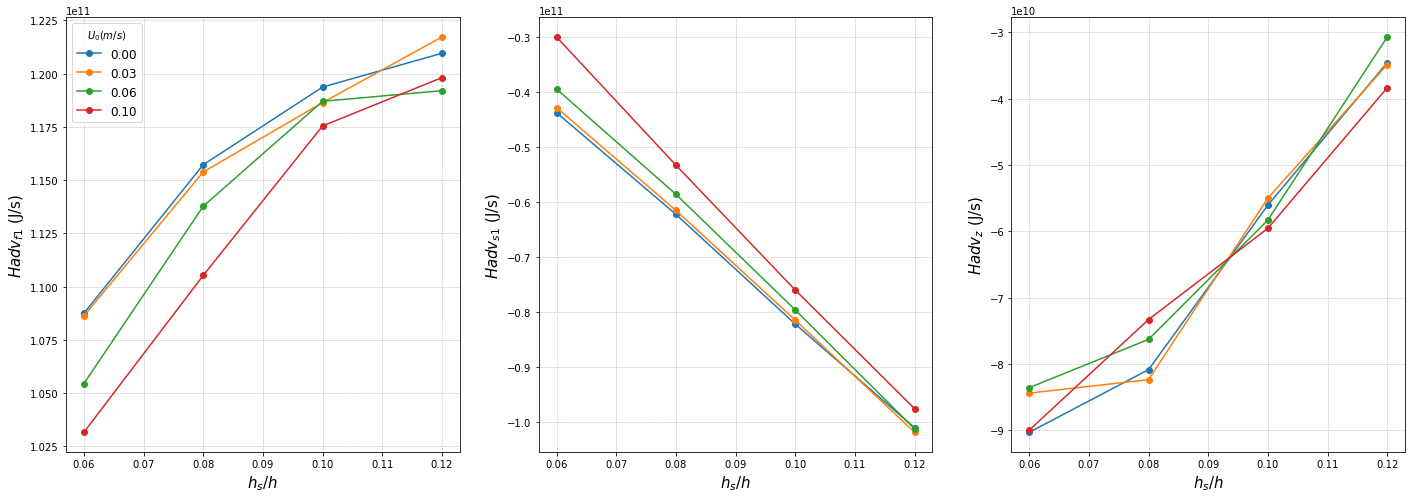

In [7]:
fig_path = "/Users/weiyangbao/Documents/Results_Figs/Transport/"
if not os.path.exists(fig_path):
    os.makedirs(fig_path)

fig1, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(24,8))

ax1.plot(hsr,path1_advf1,'o-',label='0.00')
ax1.plot(hsr,path2_advf1,'o-',label='0.03')
ax1.plot(hsr,path3_advf1,'o-',label='0.06')
ax1.plot(hsr,path4_advf1,'o-',label='0.10')
ax1.legend(loc='best', fontsize=12, title=r'$U_0(m/s)$')
ax1.set_ylabel(r'$Hadv_{f1}$ (J/s)',size = 15)
ax1.set_xlabel(r'$h_s/h$', size = 15)
#ax1.set_ylim([.2, .9])
ax1.grid(linestyle='--', linewidth='0.5')

ax2.plot(hsr,path1_advs1,'o-')
ax2.plot(hsr,path2_advs1,'o-')
ax2.plot(hsr,path3_advs1,'o-')
ax2.plot(hsr,path4_advs1,'o-')
ax2.set_ylabel(r'$Hadv_{s1}$ (J/s)',size = 15)
ax2.set_xlabel(r'$h_s/h$', size = 15)
ax2.grid(linestyle='--', linewidth='0.5')

ax3.plot(hsr,path1_advz,'o-')
ax3.plot(hsr,path2_advz,'o-')
ax3.plot(hsr,path3_advz,'o-')
ax3.plot(hsr,path4_advz,'o-')
ax3.set_ylabel(r'$Hadv_{z}$ (J/s)',size = 15)
ax3.set_xlabel(r'$h_s/h$', size = 15)
ax3.grid(linestyle='--', linewidth='0.5')
fig1.savefig(fig_path + '/Layer1Q700.png', dpi = 200, bbox_inches='tight')

In [8]:
# Heat flux terms for layer 2
def H_layer2(x1,x2):
    itf, ADzx, DFzx = Layer(uzx)
    ADf2 = np.sum(advx[:,itf[x1]:,:,x1].mean(0))
    ADs2 = -np.sum(advx[:,itf[x2]:,:,x2].mean(0))
    DFf2 = np.sum(difx[:,itf[x1]:,:,x1].mean(0))
    DFs2 = -np.sum(difx[:,itf[x2]:,:,x2].mean(0))
    return (ADf2, ADs2, DFf2, DFs2)

In [9]:
path1_advf2 = np.empty(len(hs))
path1_advs2 = np.empty(len(hs))
path1_diff2 = np.empty(len(hs))
path1_difs2 = np.empty(len(hs))
for i in range(len(hs)):
    state1 = xr.open_dataset(state_path1 + str(format(hs[i],'03d')) + '.nc').isel(X=range(120), Xp1=range(121), Y=range(30,39), Yp1=range(30,40), T=range(24,161))
    state2 = xr.open_dataset(Adv_path1 + str(format(hs[i],'03d')) + '.nc').isel(X=range(120), Xp1=range(121), Y=range(30,39), Yp1=range(30,40), T=range(23,160))
    state3 = xr.open_dataset(Dif_path1 + str(format(hs[i],'03d')) + '.nc').isel(X=range(120), Xp1=range(121), Y=range(30,39), Yp1=range(30,40), T=range(23,160))
    uzx = state1.U.data.mean(axis=(0,2)) # Z, X
    advx = state2.ADVx_TH.data * Cp * rho
    difx = state3.DFxE_TH.data * Cp * rho
    advr = state2.ADVr_TH.data * Cp * rho
    difr = state3.DFrI_TH.data * Cp * rho
    path1_advf2[i], path1_advs2[i], path1_diff2[i], path1_difs2[i] = H_layer2(f,s)
    

path2_advf2 = np.empty(len(hs))
path2_advs2 = np.empty(len(hs))
path2_diff2 = np.empty(len(hs))
path2_difs2 = np.empty(len(hs))
for i in range(len(hs)):
    state1 = xr.open_dataset(state_path2 + str(format(hs[i],'03d')) + '.nc').isel(X=range(120), Xp1=range(121), Y=range(30,39), Yp1=range(30,40), T=range(24,161))
    state2 = xr.open_dataset(Adv_path2 + str(format(hs[i],'03d')) + '.nc').isel(X=range(120), Xp1=range(121), Y=range(30,39), Yp1=range(30,40), T=range(23,160))
    state3 = xr.open_dataset(Dif_path2 + str(format(hs[i],'03d')) + '.nc').isel(X=range(120), Xp1=range(121), Y=range(30,39), Yp1=range(30,40), T=range(23,160))
    uzx = state1.U.data.mean(axis=(0,2)) # Z, X
    advx = state2.ADVx_TH.data * Cp * rho
    difx = state3.DFxE_TH.data * Cp * rho
    advr = state2.ADVr_TH.data * Cp * rho
    difr = state3.DFrI_TH.data * Cp * rho
    path2_advf2[i], path2_advs2[i], path2_diff2[i], path2_difs2[i] = H_layer2(f,s)


path3_advf2 = np.empty(len(hs))
path3_advs2 = np.empty(len(hs))
path3_diff2 = np.empty(len(hs))
path3_difs2 = np.empty(len(hs))
for i in range(len(hs)):
    state1 = xr.open_dataset(state_path3 + str(format(hs[i],'03d')) + '.nc').isel(X=range(120), Xp1=range(121), Y=range(30,39), Yp1=range(30,40), T=range(24,161))
    state2 = xr.open_dataset(Adv_path3 + str(format(hs[i],'03d')) + '.nc').isel(X=range(120), Xp1=range(121), Y=range(30,39), Yp1=range(30,40), T=range(23,160))
    state3 = xr.open_dataset(Dif_path3 + str(format(hs[i],'03d')) + '.nc').isel(X=range(120), Xp1=range(121), Y=range(30,39), Yp1=range(30,40), T=range(23,160))
    uzx = state1.U.data.mean(axis=(0,2)) # Z, X
    advx = state2.ADVx_TH.data * Cp * rho
    difx = state3.DFxE_TH.data * Cp * rho
    advr = state2.ADVr_TH.data * Cp * rho
    difr = state3.DFrI_TH.data * Cp * rho
    path3_advf2[i], path3_advs2[i], path3_diff2[i], path3_difs2[i] = H_layer2(f,s)


path4_advf2 = np.empty(len(hs))
path4_advs2 = np.empty(len(hs))
path4_diff2 = np.empty(len(hs))
path4_difs2 = np.empty(len(hs))
for i in range(len(hs)):
    state1 = xr.open_dataset(state_path4 + str(format(hs[i],'03d')) + '.nc').isel(X=range(120), Xp1=range(121), Y=range(30,39), Yp1=range(30,40), T=range(24,161))
    state2 = xr.open_dataset(Adv_path4 + str(format(hs[i],'03d')) + '.nc').isel(X=range(120), Xp1=range(121), Y=range(30,39), Yp1=range(30,40), T=range(23,160))
    state3 = xr.open_dataset(Dif_path4 + str(format(hs[i],'03d')) + '.nc').isel(X=range(120), Xp1=range(121), Y=range(30,39), Yp1=range(30,40), T=range(23,160))
    uzx = state1.U.data.mean(axis=(0,2)) # Z, X
    advx = state2.ADVx_TH.data * Cp * rho
    difx = state3.DFxE_TH.data * Cp * rho
    advr = state2.ADVr_TH.data * Cp * rho
    difr = state3.DFrI_TH.data * Cp * rho
    path4_advf2[i], path4_advs2[i], path4_diff2[i], path4_difs2[i] = H_layer2(f,s)

In [10]:
path1_diff2, path1_difs2

(array([-2.46308000e+08, -2.76052064e+08, -2.80039904e+08, -2.01649280e+08]),
 array([3.34124544e+09, 3.41746918e+09, 3.32686643e+09, 3.30081818e+09]))

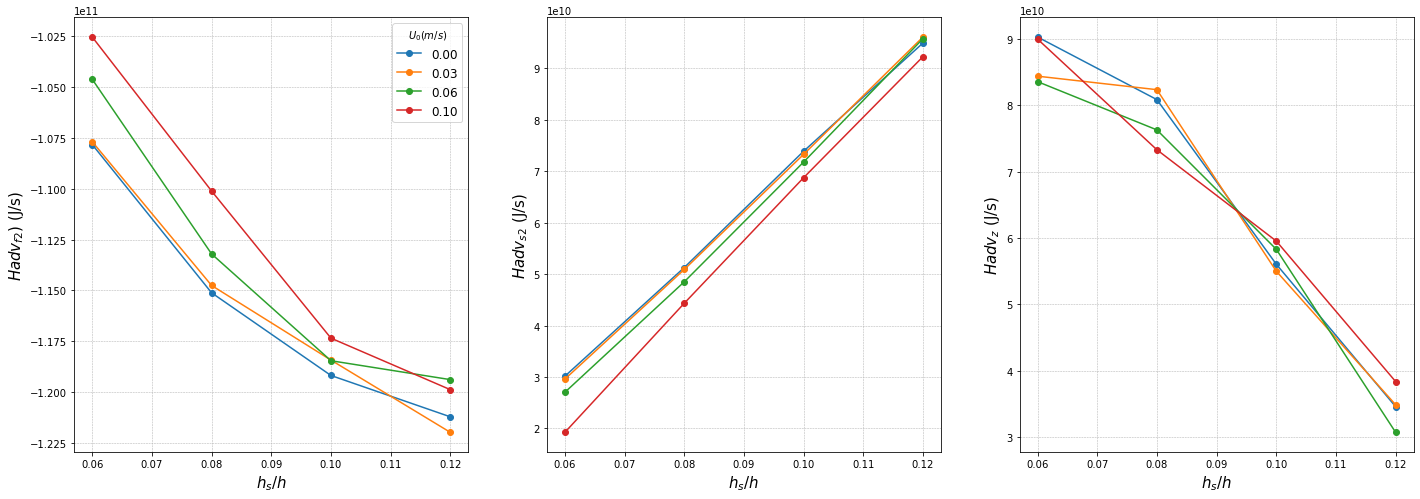

In [11]:
fig2, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(24,8))

ax1.plot(hsr,path1_advf2,'o-',label='0.00')
ax1.plot(hsr,path2_advf2,'o-',label='0.03')
ax1.plot(hsr,path3_advf2,'o-',label='0.06')
ax1.plot(hsr,path4_advf2,'o-',label='0.10')
ax1.legend(loc='best', fontsize=12, title=r'$U_0(m/s)$')
ax1.set_ylabel(r'$Hadv_{f2})$ (J/s)',size = 15)
ax1.set_xlabel(r'$h_s/h$', size = 15)
#ax1.set_ylim([.2, .9])
ax1.grid(linestyle='--', linewidth='0.5')

ax2.plot(hsr,path1_advs2,'o-')
ax2.plot(hsr,path2_advs2,'o-')
ax2.plot(hsr,path3_advs2,'o-')
ax2.plot(hsr,path4_advs2,'o-')
ax2.set_ylabel(r'$Hadv_{s2}$ (J/s)',size = 15)
ax2.set_xlabel(r'$h_s/h$', size = 15)
ax2.grid(linestyle='--', linewidth='0.5')

ax3.plot(hsr,-path1_advz,'o-')
ax3.plot(hsr,-path2_advz,'o-')
ax3.plot(hsr,-path3_advz,'o-')
ax3.plot(hsr,-path4_advz,'o-')
ax3.set_ylabel(r'$Hadv_{z}$ (J/s)',size = 15)
ax3.set_xlabel(r'$h_s/h$', size = 15)
ax3.grid(linestyle='--', linewidth='0.5')
fig2.savefig(fig_path + '/Layer2Q700.png', dpi = 200, bbox_inches='tight')

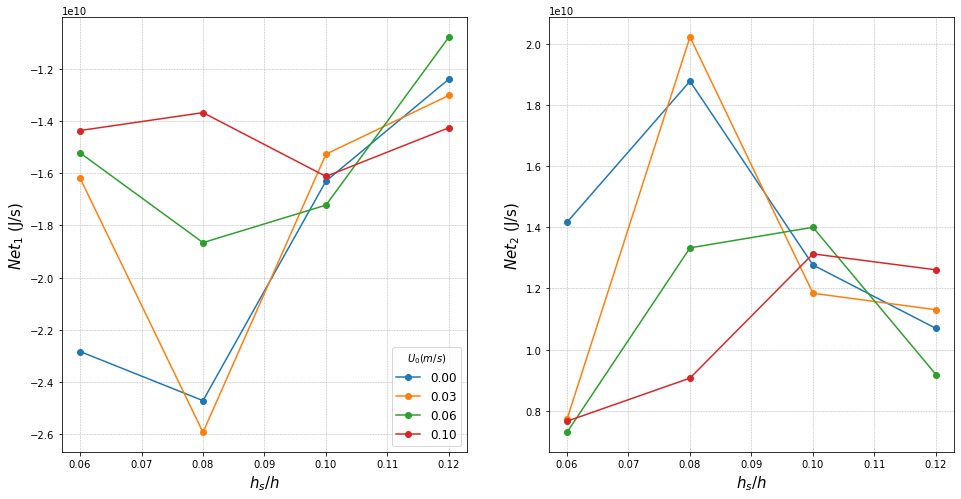

In [12]:
path1_net_h1 = path1_advf1+path1_advs1+path1_advz+path1_diff1+path1_difs1+path1_difz
path2_net_h1 = path2_advf1+path2_advs1+path2_advz+path2_diff1+path2_difs1+path2_difz
path3_net_h1 = path3_advf1+path3_advs1+path3_advz+path3_diff1+path3_difs1+path3_difz
path4_net_h1 = path4_advf1+path4_advs1+path4_advz+path4_diff1+path4_difs1+path4_difz

path1_net_h2 = path1_advf2+path1_advs2-path1_advz+path1_diff2+path1_difs2-path1_difz
path2_net_h2 = path2_advf2+path2_advs2-path2_advz+path2_diff2+path2_difs2-path2_difz
path3_net_h2 = path3_advf2+path3_advs2-path3_advz+path3_diff2+path3_difs2-path3_difz
path4_net_h2 = path4_advf2+path4_advs2-path4_advz+path4_diff2+path4_difs2-path4_difz


fig3, (ax1, ax2) = plt.subplots(1,2, figsize=(16,8))

ax1.plot(hsr,path1_net_h1,'o-',label='0.00')
ax1.plot(hsr,path2_net_h1,'o-',label='0.03')
ax1.plot(hsr,path3_net_h1,'o-',label='0.06')
ax1.plot(hsr,path4_net_h1,'o-',label='0.10')
ax1.legend(loc='best', fontsize=12, title=r'$U_0(m/s)$')
ax1.set_ylabel(r'$Net_{1}$ (J/s)',size = 15)
ax1.set_xlabel(r'$h_s/h$', size = 15)
#ax1.set_ylim([.2, .9])
ax1.grid(linestyle='--', linewidth='0.5')

ax2.plot(hsr,path1_net_h2,'o-')
ax2.plot(hsr,path2_net_h2,'o-')
ax2.plot(hsr,path3_net_h2,'o-')
ax2.plot(hsr,path4_net_h2,'o-')
ax2.set_ylabel(r'$Net_{2}$ (J/s)',size = 15)
ax2.set_xlabel(r'$h_s/h$', size = 15)
ax2.grid(linestyle='--', linewidth='0.5')
fig3.savefig(fig_path + '/NetQ700.png', dpi = 200, bbox_inches='tight')